<a href="https://colab.research.google.com/github/GaneshSelvaraj717/Ganesh-Selvaraj/blob/master/M1_AST_05_Numerical_Optimization_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Programme in Deep Learning (Foundations and Applications)
## A Program by IISc and TalentSprint
### Assignment 5: Numerical Optimization 

## Learning Objectives

At the end of the assignment, you will be able to

* Understanding local and global minima
* Interpreting the criteria to find global minima and local minima
* Implement gradient descent and understanding its convergence process



In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2101155" #@param {type:"string"}

In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9176063427" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "M1_AST_05_Numerical_Optimization_A" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")  
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa.iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError 
    else: 
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError 
    else: 
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Please enter valid Id


### Import the required Packages


In [5]:
import pandas as pd
import numpy as np
import random
import pdb
from matplotlib import pyplot as plt

1. Given the following quadratic function: $x^{2} - 2x + 1$, verify the necessary and sufficient conditions for global minima.



In [6]:
# Calculate minima and show the plot
#Your code here

def PrintMaxMinValue(a, b, c) :
 
    # Calculate the value of second part
    secondPart = c * 1.0 - (b * b / (4.0 * a));
     
    # Print the values
    if (a > 0) :
         
        # Open upward parabola function
        print("Maxvalue =", "Infinity");
        print("Minvalue = ", secondPart);
         
    elif (a < 0) :
         
        # Open downward parabola function
        print("Maxvalue = ", secondPart);
        print("Minvalue =", "-Infinity");
         
    else :
         
        # If a=0 then it is not a quadratic function
        print("Not a quadratic function");
 
# Driver code
if __name__ == "__main__" :
    a = 1; b = -2; c = 1;
 
    PrintMaxMinValue(a, b, c);
 

Maxvalue = Infinity
Minvalue =  0.0


2. Given the following quadratic function: $x^{3} - 9x^{2} - 48x + 52$, verify the necessary and sufficient conditions for local minima and maxima in the closed interval [−10, 20].

In [10]:
# Calculate  minima and show the plot
from scipy.optimize import minimize
def fun(x):
    return x**3 - 9*x**2 - 48*x + 52

fit = minimize(fun, x0=1, method='L-BFGS-B', bounds=((-10,20),))
print(fit.x)

[7.99999964]


### Gradient Descent

Gradient descent is an optimization algorithm used to find the values of parameters (coefficients) of a function that minimizes a **cost function**.

It is used while training a machine learning model. It is an optimization algorithm, based on  first order gradients, that tweaks it’s parameters iteratively to minimize a given function to its local minimum and global minima if the function is convex.


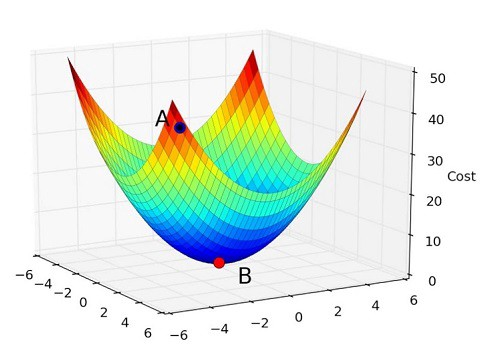

Further, a **cost function** is a measure of how wrong the model is in terms of its ability to estimate the relationship between X and y. This is typically expressed as a difference or distance between the predicted value and the actual value.

To learn more about Gradient Descent click [here](https://towardsdatascience.com/implement-gradient-descent-in-python-9b93ed7108d1)

3. Find the global minima of the function $y=x^{2} - 2x + 1$ starting from the point x=3.

In [12]:
def plotFunc(x0):
    x = np.linspace(-5, 7, 100)
    plt.plot(x, func(x))
    plt.plot(x0, func(x0), 'ro')
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.title('Objective Function')

def plotPath(xs, ys, x0):
    plotFunc(x0)
    plt.plot(xs, ys, linestyle='--', marker='o', color='orange')
    plt.plot(xs[-1], ys[-1], 'ro')

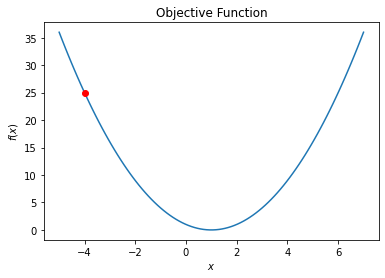

In [13]:
x0 = -4
plotFunc(x0)

Initializing the parameters

In [18]:
# The algorithm starts at x=3
cur_x = 3
# Learning rate
rate = 0.01 

# Compute Gradient 
def func(x):
    return x**2 - 2*x +1

def gradf(x):
    return 2*x - 2

Run a loop to perform gradient descent. Stop the loop when difference between x values from 2 consecutive iterations is less than 0.000001 or when number of iterations exceeds 1000.

In [23]:
# Declaring y_m and x_m for storing the values of f(cur_x) and cur_x
y_m = []
x_m = []
# while previous_step_size > precision and iters < max_iters:
    
    # Compute Gradient descent
#    def GradientDescent(func, fprime, cur_x, rate, tol=1e-5, max_iter=1000):
      # initialize x, f(x), and -f'(x)
tol = 0.000001
max_iter = 1000
xk = cur_x
fk = func(xk)
pk = -gradf(xk)
# initialize number of steps, save x and f(x)
num_iter = 0
x_m = [xk]
y_m = [fk]
# take steps
while abs(pk) > tol and num_iter < max_iter:
  # calculate new x, f(x), and -f'(x)
  xk = xk + rate * pk
  fk = func(xk)
  pk = -fprime(xk)
  # increase number of steps by 1, save new x and f(x)
  num_iter += 1
  x_m.append(xk)
  y_m.append(fk)
  # print result
  if num_iter == max_iter:
    print('Gradient descent does not converge.')
  else:
    print('Solution found:\n  y = {:.4f}\n  x = {:.4f}'.format(fk, xk))

Solution found:
  y = 3.8416
  x = 2.9600
Solution found:
  y = 3.6895
  x = 2.9208
Solution found:
  y = 3.5434
  x = 2.8824
Solution found:
  y = 3.4031
  x = 2.8447
Solution found:
  y = 3.2683
  x = 2.8078
Solution found:
  y = 3.1389
  x = 2.7717
Solution found:
  y = 3.0146
  x = 2.7363
Solution found:
  y = 2.8952
  x = 2.7015
Solution found:
  y = 2.7805
  x = 2.6675
Solution found:
  y = 2.6704
  x = 2.6341
Solution found:
  y = 2.5647
  x = 2.6015
Solution found:
  y = 2.4631
  x = 2.5694
Solution found:
  y = 2.3656
  x = 2.5380
Solution found:
  y = 2.2719
  x = 2.5073
Solution found:
  y = 2.1819
  x = 2.4771
Solution found:
  y = 2.0955
  x = 2.4476
Solution found:
  y = 2.0125
  x = 2.4186
Solution found:
  y = 1.9329
  x = 2.3903
Solution found:
  y = 1.8563
  x = 2.3625
Solution found:
  y = 1.7828
  x = 2.3352
Solution found:
  y = 1.7122
  x = 2.3085
Solution found:
  y = 1.6444
  x = 2.2823
Solution found:
  y = 1.5793
  x = 2.2567
Solution found:
  y = 1.5167
  x =

Plotting the graph

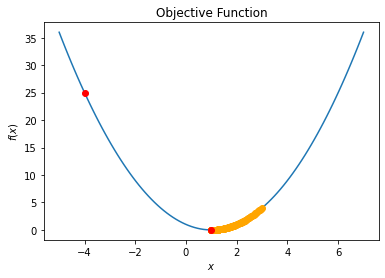

In [25]:
plotPath(x_m, y_m, x0)

4. Find the local minima of the function $y=x^{3} - 9x^{2} -48x + 52$ starting from the point x = 10

Initializing the parameters

In [ ]:
# The algorithm starts at x=3
cur_x = 10
# Learning rate
rate = 0.01 

# Compute Gradient
# YOUR CODE HERE

Run a loop to perform gradient descent. Stop the loop when difference between x values from 2 consecutive iterations is less than 0.000001 or when number of iterations exceeds 1000.

In [ ]:
# Declaring y_m and x_m for storing the values of f(cur_x) and cur_x
y_m = []
x_m = []
while previous_step_size > precision and iters < max_iters:
    
    # Gradient descent
    # YOUR CODE HERE

Plotting the graph

In [ ]:
# Plotting the graph for x_m and y_m
# YOUR CODE HERE

### Please answer the questions below to complete the experiment:




Given the function $f(x) = x^{2}-2y^{2}-4y+6$, answer the Q.1.

In [ ]:
#@title Q.1. Determine the gradient of the function f(x) at (0,1). { run: "auto", form-width: "500px", display-mode: "form" }
Answer1 = "" #@param ["","i-4j", "0i+0j", "2i-8j", "0i-8j"]


Given the function $F(x,y) = x^2 + y^2$, answer the Q.2

In [ ]:
#@title Q.2. Inspect the function F(x,y) and find any maxima or minima. Can you tell whether they are global or local? (Hint : Check the necessary and sufficient conditions by computing the Hessian. ) { run: "auto", form-width: "500px", display-mode: "form" }
Answer2 = "" #@param ["","F(x, y) has a Global Maxima = 0 at (0, 0)", "F(x, y) has a Local Maxima = 0 at (0, 0)", "F(x, y) has a Global Minima = 0 at (0, 0)", "F(x, y) has a Local Minima = 0 at (0, 0)"]


In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")